# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

Follow the instructions below to get started in building a DNN for solving the problem.

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [5]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

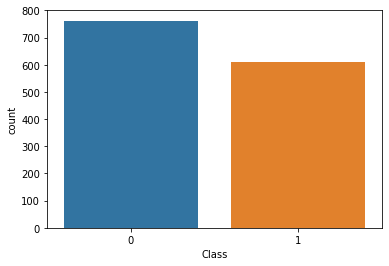

In [8]:
sn.countplot(x='Class', data=data)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

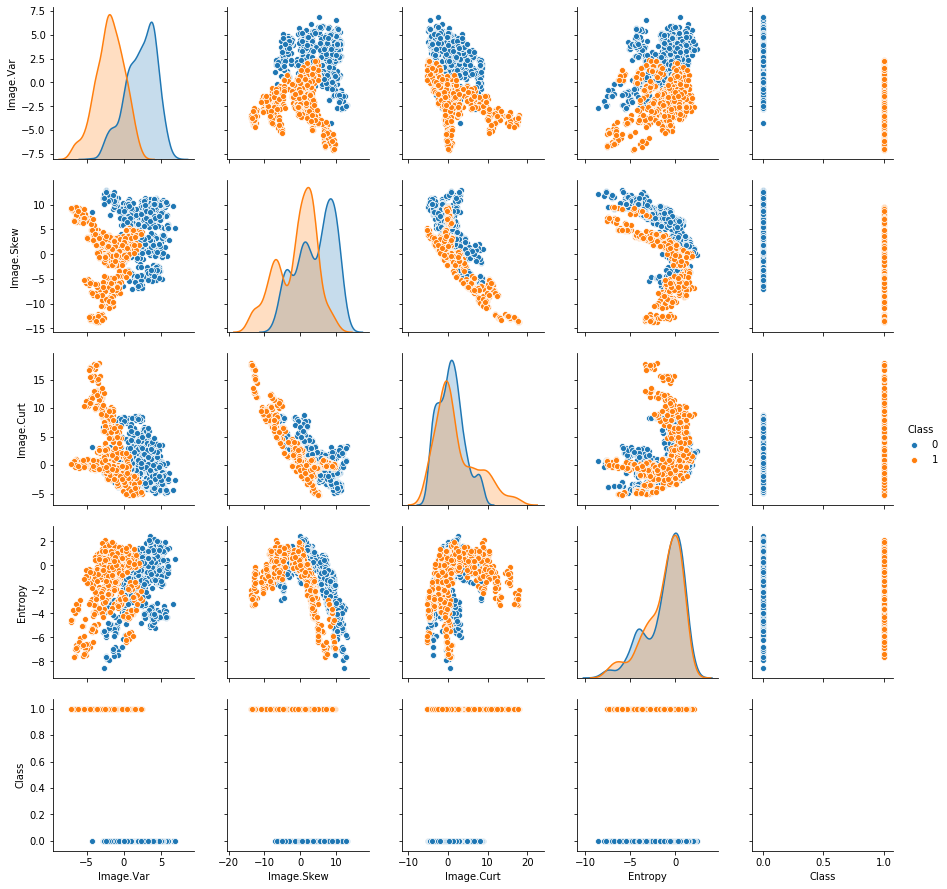

In [9]:
sn.pairplot(data, hue='Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [10]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [11]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [12]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [14]:
scaler.transform(data)

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135, -0.89472059],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744, -0.89472059],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317, -0.89472059],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418,  1.11766736],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848,  1.11766736],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ,  1.11766736]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [44]:
data_scaled = pd.DataFrame(scaler.transform(data),columns=['Image_Var','Image_Skew', 'Image_Curt', 'Image_Entropy', 'Class'])
data_scaled['Class'] = data['Class']
data_scaled.head()

,Image_Var,Image_Skew,Image_Curt,Image_Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [45]:
X = data_scaled.drop(columns=['Class'])

In [46]:
y = data_scaled['Class']

** Use SciKit Learn to create training and testing sets of the data **

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

# Tensorflow

Take into account the following tf commands:
tf.estimator.inputs.pandas_input_fn(...)
tf.estimator.inputs.numpy_input_fn(...)
tf.estimator.DNNClassifier(...)

In [49]:
import tensorflow as tf

** Create a list of feature column objects using tf.feature.numeric_column() **

In [50]:
feature_columns = []
for col in data_scaled.drop(columns=['Class']).columns:
    feature_columns.append(tf.feature_column.numeric_column(col))
print(feature_columns)

[NumericColumn(key='Image_Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Image_Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Image_Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Image_Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [51]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    
    hidden_units=[10,20,10],
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1f7d3ru7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f252df1aa90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

In [52]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=20,shuffle=True)

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [53]:
classifier.train(input_fn=train_input_fn, steps=500)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1f7d3ru7/model.ckpt.
INFO:tensorflow:loss = 15.102064, step = 0
INFO:tensorflow:Saving checkpoints for 46 into /tmp/tmp1f7d3ru7/model.ckpt.
INFO:tensorflow:Loss for final step: 0.48199847.


## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [62]:
test_input_fn = tf.estimator.inputs.pandas_input_fn(x_test,shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [103]:
y_pred = list(classifier.predict(input_fn=test_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1f7d3ru7/model.ckpt-46
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [111]:
y_pred[0]['classes'].astype(int)[0]

0

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [75]:
from sklearn.metrics import classification_report, confusion_matrix 

In [107]:
tf.confusion_matrix(y_test,y_pred)

RuntimeError: Graph is finalized and cannot be modified.

In [29]:
classification_report(y_test,y_predict)

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       215
          1       0.99      0.95      0.97       197

avg / total       0.97      0.97      0.97       412



** It should have done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!